# This notebook will show how our Fashion MNIST model is developed and saved for use in our API

In [8]:
### Load libraries and verify versions
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [4]:
### Next we will load in the Fashion MNIST dataset which is a default in the Keras module:
fashion_mnist = keras.datasets.fashion_mnist

### Split out data set into our train and test sets for model development:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
### validate our outputs are as expected:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [18]:
### Create validation data set and scale image features:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [9]:
### Establish categorical names for the number labels:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

#### Example:
class_names[y_train[0]]

'Coat'

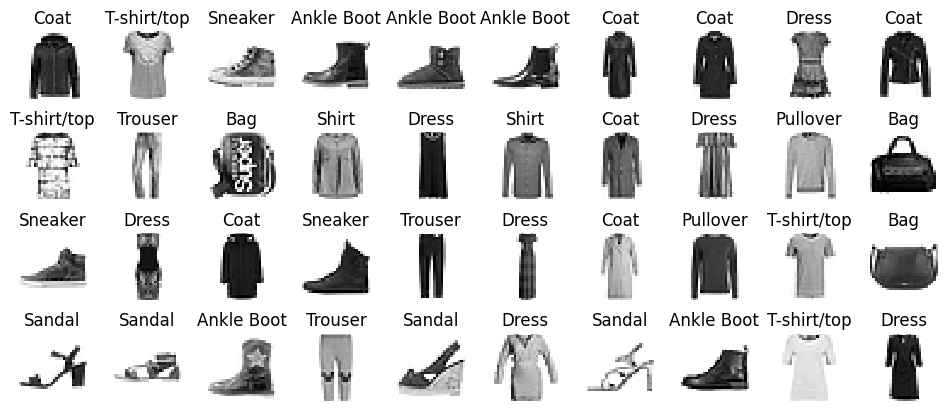

In [10]:
### Do some quick EDA on the input dataset:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [11]:
### Architect the NN used for this model
model = keras.models.Sequential() ## initialize the keras sequential model
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [12]:
### Look at model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
### Compile model prior to training:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [14]:
### Train model and stash training logs for model performance review:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7260 - accuracy: 0.7608 - val_loss: 0.5229 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4932 - accuracy: 0.8265 - val_loss: 0.4775 - val_accuracy: 0.8312
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4475 - accuracy: 0.8428 - val_loss: 0.4195 - val_accuracy: 0.8552
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4203 - accuracy: 0.8521 - val_loss: 0.4064 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3997 - accuracy: 0.8590 - val_loss: 0.3987 - val_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3823 - accuracy: 0.8649 - val_loss: 0.3880 - val_accuracy: 0.8654
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3704 - accuracy: 0.8686 - val_loss: 0.3643 - val_accurac

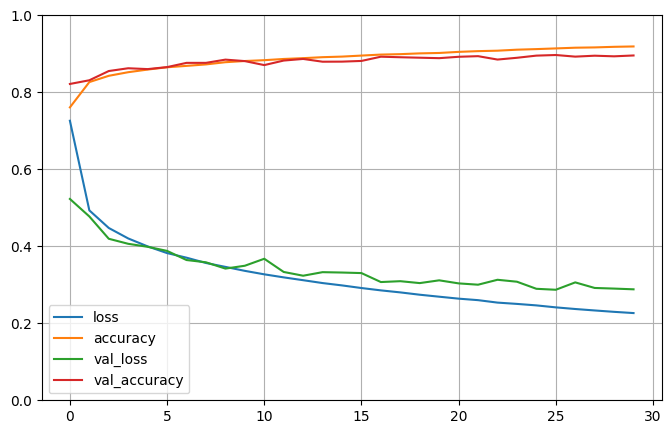

In [15]:
### Look at model training metrics and development:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Here our model is showing adequate learning over the training period. There are minimal signs of overfitting and our metrics are starting to plateau indicating high marginal costs for additional gain for training with our current model architecture and hyperparameter space. We are at an adequate spot to validate the model is performing as intended.

In [19]:
### Evaluate our model performance on the test set:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8794


[0.3296251595020294, 0.8794000148773193]

Here we can see our model performance on the test set is inline with our training. There is a slight dropoff in performance as is expected, but overall our model is ready for an Alpha launch into production.

In [21]:
### Demonstrate predictions:
X_new = X_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 176ms/step


array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

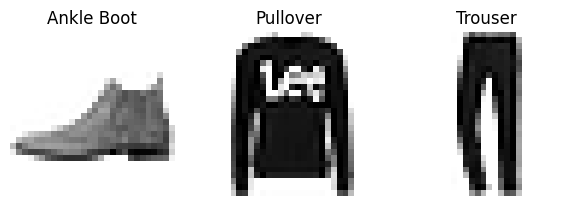

In [22]:
### See how predictions align with Truth:
y_new = y_test[:3]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

This demonstrates that our model is able to successfully predict the samples: An Ankle Boot, a Pullover, and Trousers.

In [23]:
### Finally, it is time to save the model for use in our ML API:
model.save("fashion_mnist.h5")